In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
url="https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df=pd.read_csv(url)

# Use pandas to get some insights into the data

In [3]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df.reset_index(drop = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
df.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [6]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [7]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
x = df.shape
print("\n shape : \n",x)

y = df.size
print("\n size : \n",y)


 shape : 
 (645, 7)

 size : 
 4515


In [9]:
df.rename(columns = {"TotalFloor" : "Total-Floors"})

,Sqft,Floor,Total-Floors,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [10]:
df[df["Sqft"] >= 1000.000]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
5,1127.886,11,12,4,2,2,148000
...,...,...,...,...,...,...,...
638,1707.840,9,15,3,2,2,80000
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
643,1707.840,3,14,3,2,2,65000


In [11]:
df["Sqft"].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [12]:
df["Bathroom"].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [14]:
df.isnull().count()

Sqft           645
Floor          645
TotalFloor     645
Bedroom        645
Living.Room    645
Bathroom       645
Price          645
dtype: int64

# Show some interesting visualization of the data

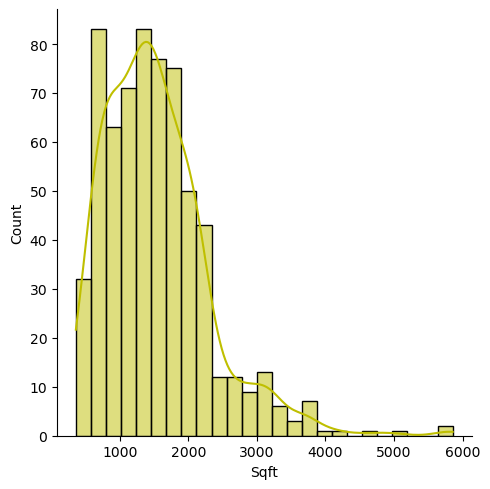

In [15]:
sns.displot(df['Sqft'],kde = True,color = "y" )

<Axes: >

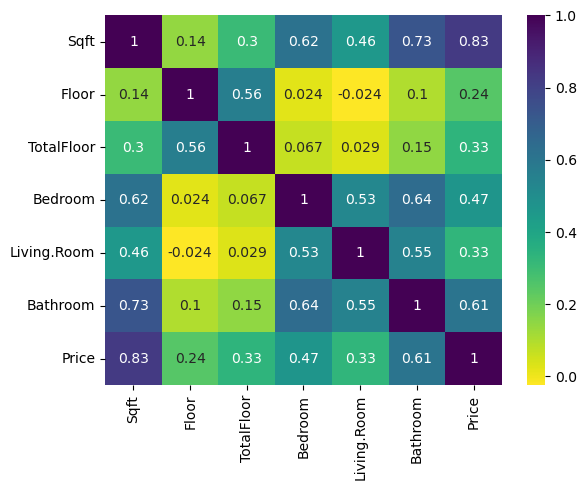

In [16]:
sns.heatmap(df.corr(), annot = True,cmap=plt.cm.get_cmap('viridis_r'))

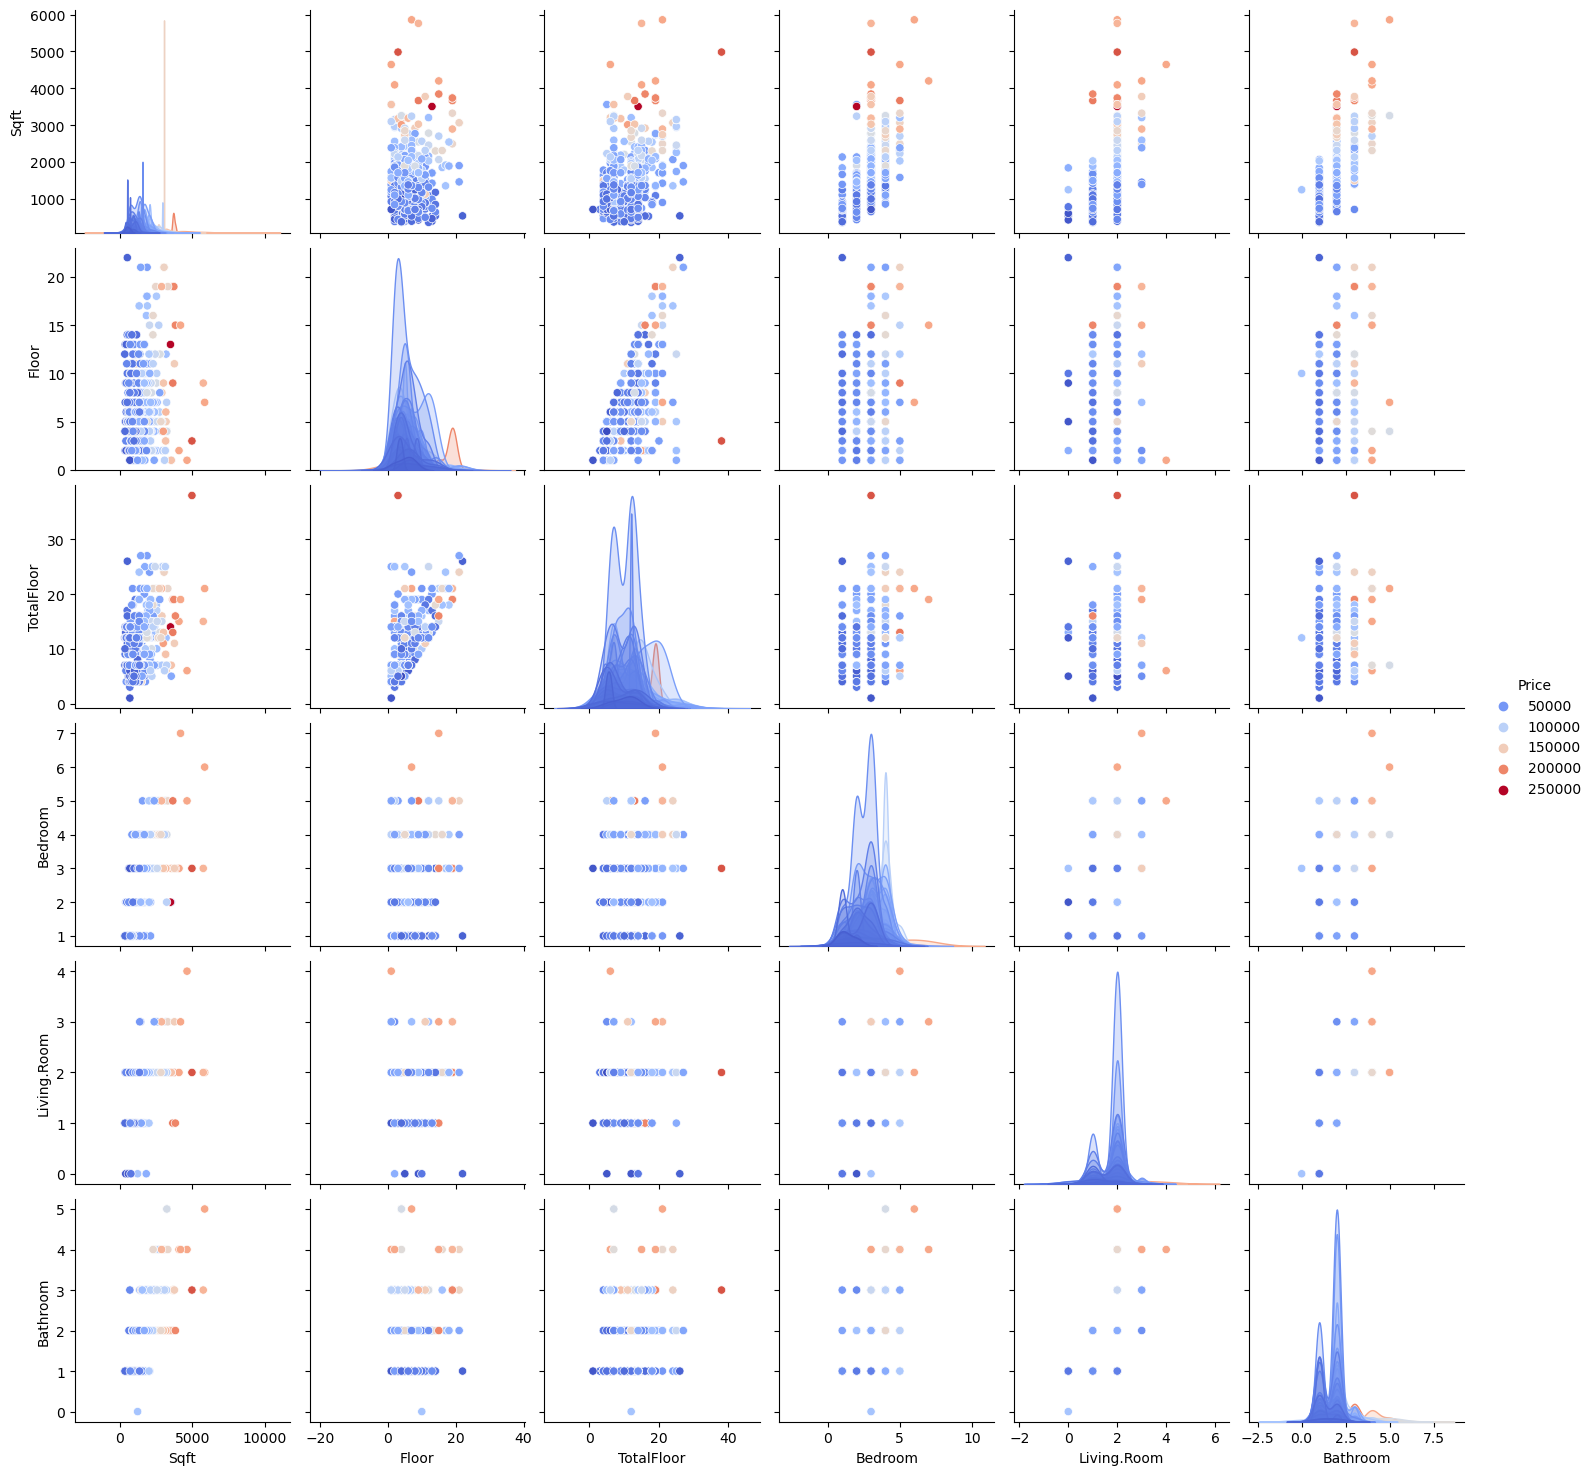

In [17]:
sns.pairplot(data = df,hue = "Price",palette = 'coolwarm')

<Axes: xlabel='Sqft', ylabel='Price'>

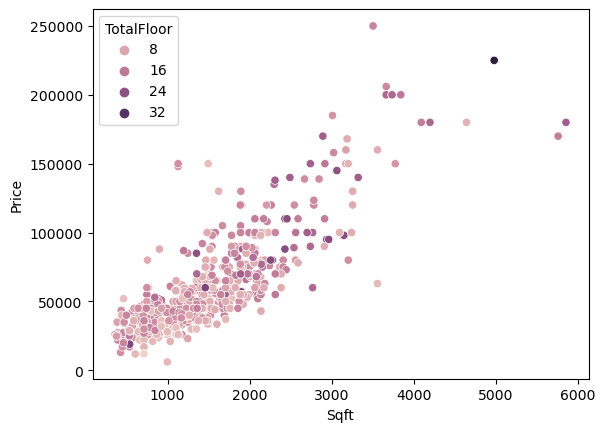

In [18]:
sns.scatterplot(data=df,x = df['Sqft'],y = df["Price"],hue = "TotalFloor")

<Axes: xlabel='Sqft', ylabel='Bathroom'>

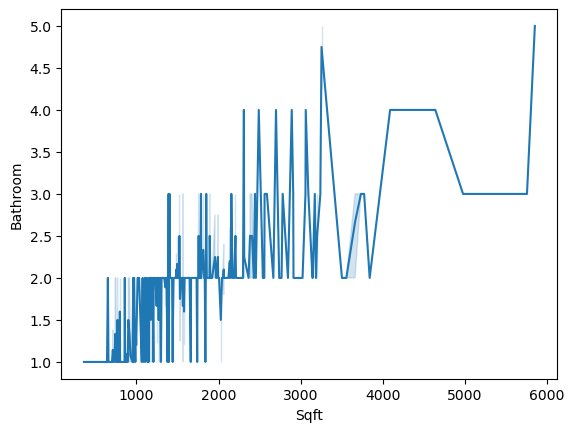

In [19]:
sns.lineplot(x = df["Sqft"], y = df["Bathroom"])

# Manage data for training & testing

In [20]:
from scipy import stats
x = np.abs(stats.zscore(df))
print(x)

         Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom     Price
0    0.456393  1.014897    0.772347  0.828956     0.402694  0.276918  0.000370
1    0.791798  0.242042    0.772347  1.151328     0.402694  0.276918  0.449714
2    0.507434  0.242042    0.772347  0.828956     0.402694  1.187117  0.111966
3    0.089824  1.014897    0.772347  0.161186     0.402694  0.276918  0.477058
4    0.730160  1.303669    0.629803  0.161186     0.402694  0.276918  0.477058
..        ...       ...         ...       ...          ...       ...       ...
640  0.219747  0.273195    0.830110  0.161186     0.402694  0.276918  0.477058
641  1.500419  0.499660    0.171426  1.819099     1.761785  1.187117  1.044355
642  1.027127  1.818907    0.629803  1.819099     1.761785  1.187117  0.477058
643  0.234984  0.757279    0.629803  0.161186     0.402694  0.276918  0.084622
644  0.196547  0.015577    0.772347  0.161186     0.402694  1.187117  0.729814

[645 rows x 7 columns]


In [21]:
X = df.drop(labels = ['Price'] , axis = 1)
y = df['Price']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [24]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [25]:
rmse = []
for k in range(1,21):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    
    print('RMSE for k =',k,'is',error)

RMSE for k = 1 is 37673.82255131416
RMSE for k = 2 is 32057.701116064127
RMSE for k = 3 is 31134.67502238226
RMSE for k = 4 is 29527.735724148493
RMSE for k = 5 is 27885.373764575535
RMSE for k = 6 is 26922.058897686155
RMSE for k = 7 is 26138.51781372649
RMSE for k = 8 is 25642.80993023141
RMSE for k = 9 is 24981.93139524966
RMSE for k = 10 is 24934.803124205097
RMSE for k = 11 is 24638.089299636387
RMSE for k = 12 is 24425.464665663156
RMSE for k = 13 is 24356.85858344697
RMSE for k = 14 is 24147.638567451573
RMSE for k = 15 is 24183.668625689123
RMSE for k = 16 is 24103.68996213124
RMSE for k = 17 is 24223.824033085617
RMSE for k = 18 is 24502.783611654053
RMSE for k = 19 is 24457.869839554263
RMSE for k = 20 is 24399.146879558142


<Axes: >

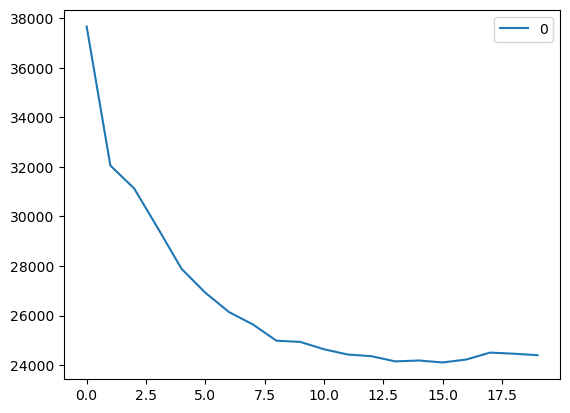

In [26]:
curve = pd.DataFrame(rmse)
curve.plot()